##### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import spacy
from spacy.language import Language
import re
from spacy_langdetect import LanguageDetector
from tqdm.notebook import tqdm_notebook
from neuspell import BertChecker

tqdm_notebook.pandas()
# spacy.prefer_gpu()


data folder is set to `/home/talha/dev/university_code/semester_7/ml/project_daraz_reviews/.env/lib/python3.9/site-packages/neuspell/../data` script


In [2]:
## Initial Spacy
nlp = spacy.load('en_core_web_trf')

In [3]:
## Spacy Related Functions
@Language.factory("language_detector")
def get_lang_detector(nlp, name):
   return LanguageDetector()

In [4]:
## Pipes
nlp.add_pipe('sentencizer')
nlp.add_pipe('language_detector')

In [5]:
# Load our cleaned data
df = pd.read_csv('scrapped_data.csv')
df.head(20)


,reviews
0,original as shown in advertisement.\ngood qual...
1,"Same as shown in picture. Received same color,..."
2,"comfortable, and very soft item, love it and m..."
3,it was packed well... same as shown ..i ordere...
4,for healthy Bady sitting space is less to sit....
5,No doubt same as in the pic but just for 3-4 m...
6,comfortable but size is very small
7,So haPpy to receive the parcel. Exactly same a...
8,Good product same as shown in pic 😊 recommended
9,Quality was soo good just like shown in picture.


### Data Cleaning

##### Remove non-alphanumeric characters

In [6]:
def clean_text(text):
  """
  Clean the text 
  """
  text = re.sub(r'\n', ' ', text) # remove new lines
  text = re.sub(r'[^\w\s]', ' ', text) # remove punctuation & symbols
  text = re.sub(r'\s+', ' ', text) # remove extra spaces
  text = text.lower()
  return text


In [6]:
# Remove punctuation and symbols from the text
df['cleaned_reviews'] = df['reviews'].progress_apply(clean_text)
df.head(20)

  0%|          | 0/5234 [00:00<?, ?it/s]

,reviews,cleaned_reviews
0,original as shown in advertisement.\ngood qual...,original as shown in advertisement good qualit...
1,"Same as shown in picture. Received same color,...",same as shown in picture received same color w...
2,"comfortable, and very soft item, love it and m...",comfortable and very soft item love it and my ...
3,it was packed well... same as shown ..i ordere...,it was packed well same as shown i ordered pin...
4,for healthy Bady sitting space is less to sit....,for healthy bady sitting space is less to sit ...
5,No doubt same as in the pic but just for 3-4 m...,no doubt same as in the pic but just for 3 4 m...
6,comfortable but size is very small,comfortable but size is very small
7,So haPpy to receive the parcel. Exactly same a...,so happy to receive the parcel exactly same as...
8,Good product same as shown in pic 😊 recommended,good product same as shown in pic recommended
9,Quality was soo good just like shown in picture.,quality was soo good just like shown in picture


##### Remove non-english reviews

In [7]:
def find_lang(text):
  """
  Find the language of the text
  """
  with nlp.select_pipes(enable=['sentencizer', 'language_detector', ]):
    doc = nlp(text)
    return doc._.language


def is_not_english(text):
  """
  Check if the text is in english
  """
  return find_lang(text) != 'en'


In [8]:
# Filter out the reviews with that are not in English
df['cleaned_reviews'] = df[df['cleaned_reviews'].progress_apply(
    is_not_english)]['cleaned_reviews']
df.head()

KeyError: 'cleaned_reviews'

##### Fix the spelling mistakes

In [9]:
checker = BertChecker(device="cuda")
checker.from_pretrained()
def fix_spell(text):
  """
  Fix the spelling of the text
  """
  return checker.correct(text)


loading vocab from path:/home/talha/dev/university_code/semester_7/ml/project_daraz_reviews/.env/lib/python3.9/site-packages/neuspell/../data/checkpoints/subwordbert-probwordnoise/vocab.pkl
initializing model


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


SubwordBert(
  (bert_dropout): Dropout(p=0.2, inplace=False)
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): 

In [ ]:
df['cleaned_reviews'] = df['cleaned_reviews'].progress_apply(fix_spell)
df.head(20)

##### Remove Stopwords

In [10]:
# Download few nltk packages
nltk.download('stopwords')
# english stopwords
stopwords = nltk.corpus.stopwords.words('english')


[nltk_data] Downloading package stopwords to /home/talha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def remove_stopwords(text):
  """
  Remove stopwords from text
  """
  # Tokenize text
  tokens = nltk.word_tokenize(text)
  # Remove stopwords
  filtered_tokens = [word for word in tokens if word not in stopwords]
  # Join filtered tokens
  filtered_text = ' '.join(filtered_tokens)

  return filtered_text


In [ ]:
df['cleaned_reviews'] = df['cleaned_reviews'] .apply(remove_stopwords)
df.head()

##### Perfoming Lemmatization

In [12]:

def lemmatize(text):
  """
  Lemmatize text
  """
  with nlp.select_pipes(enable=["tagger","attribute_ruler", "lemmatizer"]):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

In [ ]:
df['cleaned_reviews'] = df['cleaned_reviews'].progress_apply(lemmatize)
df.head()

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

##### Data Transformation

In [13]:
df = pd.read_csv('cleaned_data_labeled.csv')
df.head()

,reviews,cleaned_reviews,label
0,original as shown in advertisement.\ngood qual...,original shown advertisement good quality reli...,1
1,"Same as shown in picture. Received same color,...",shown picture received color order good qualit...,1
2,"comfortable, and very soft item, love it and m...",comfortable soft item love baby girl happy hig...,1
3,it was packed well... same as shown ..i ordere...,packed well shown ordered pink thank god recei...,1
4,for healthy Bady sitting space is less to sit....,healthy body sitting space less cut size small...,1


In [14]:
# Initializing SKLearn's CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vec_count = CountVectorizer(max_features=1000)

In [29]:
# Converting cleaned dataset into bag of words
X = vec_count.fit_transform(df['cleaned_reviews'].apply(lambda x: np.str_(x))).toarray()
# Get labels
y = df.iloc[:, -1].apply(float)
X.shape, y.shape

((5234, 1000), (5234,))

#### Training the Model

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

mlp = MLPClassifier(max_iter=1000)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting classifier to the Training set
mlp.fit(X_train, y_train)

print(mlp.score(X_test, y_test))


0.8557784145176696


##### Saving the Model

In [42]:
import pickle

pickle.dump(vec_count, open('vectorizer.pkl', 'wb'))
pickle.dump(mlp, open('model.pkl', 'wb'))

##### Analysis

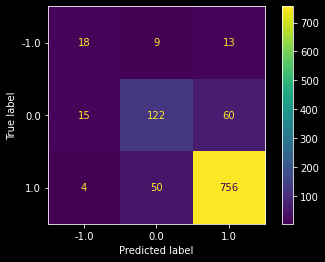

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

y_pred = mlp.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Playground

In [43]:
mlp = pickle.load(open('model.pkl', 'rb'))
vec_count = pickle.load(open('vectorizer.pkl', 'rb'))

In [44]:
def preprocess_text(text):
  """
  Preprocess the text
  """
  text = clean_text(text)
  text = fix_spell(text)
  text = remove_stopwords(text)
  text = lemmatize(text)
  text = vec_count.transform([text]).toarray()
  
  return text
  

#### Playing the model

In [45]:
p_review = preprocess_text('The product is bad')

mlp.predict(p_review)

array([-1.])

In [46]:
p_review = preprocess_text('The product is okay')

mlp.predict(p_review)

array([0.])

In [47]:
p_review = preprocess_text('The product is good')

mlp.predict(p_review)

array([1.])